In [6]:
import pandas as pd
import numpy as np
import seaborn as sns


### Q1.

어떤 회사에서 생산한 'suv' 차종의 도시 연비가 높은지 알아보려고 합니다.  
'suv' 차종을 대상으로 cty(도시 연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보세요.  
막대는 연비가 높은 순으로 정렬하세요.


In [7]:
mpg = pd.read_csv('../mpg.csv')
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:xlabel='manufacturer', ylabel='mean_cty'>

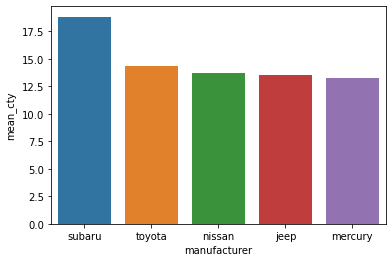

In [20]:
df_mpg = mpg.query('category == "suv"') \
    .groupby('manufacturer', as_index=False) \
    .agg(mean_cty=('cty', 'mean')) \
    .sort_values('mean_cty', ascending=False) \
    .head(5)
sns.barplot(data=df_mpg, x='manufacturer', y='mean_cty')


### Q2.
자동차 중에 어떤 category(자동차 종류)가 많은지 알아보려고 합니다.  
sns.barplot()을 이용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보세요.  
막대는 빈도가 높은 순으로 정렬하세요.

In [26]:
df_mpg = mpg.groupby('category', as_index=False) \
    .agg(n=('category', 'count')) \
    .sort_values('n', ascending=False)
df_mpg


,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<AxesSubplot:xlabel='category', ylabel='n'>

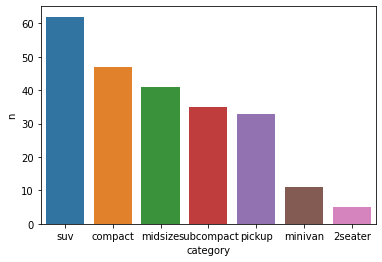

In [27]:
sns.barplot(data=df_mpg, x = 'category', y = 'n')

<AxesSubplot:xlabel='category', ylabel='count'>

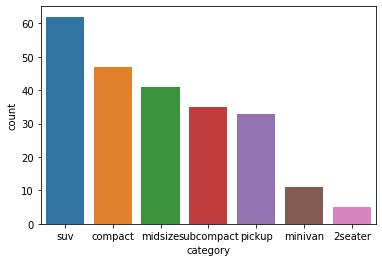

In [30]:
sns.countplot(data=mpg, x='category',
              order=mpg['category'].value_counts().index)
